<a href="https://colab.research.google.com/github/duTianze/BPNN/blob/master/binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1.from kaggle download dataset**

In [0]:
!pip3 install kaggle
!kaggle
!echo "{\"username\":\"dutianze\",\"key\":\"ff2944c6219d449b37460827c4414422\"}" > /root/.kaggle/kaggle.json
!kaggle datasets download -d dutianze/diabetic_bin

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 11, in <module>
    load_entry_point('kaggle==1.5.3', 'console_scripts', 'kaggle')()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 489, in load_entry_point
    return get_distribution(dist).load_entry_point(group, name)
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2793, in load_entry_point
    return ep.load()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2411, in load
    return self.resolve()
  File "/usr/local/lib/python2.7/dist-packages/pkg_resources/__init__.py", line 2417, in resolve
    module = __import__(self.module_name, fromlist=['__name__'], level=0)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 116, in authenticate
    self.config_file, self.config_d

###2. unzip file and process to two kinds

In [0]:
!apt-get install zip
!unzip diabetic_bin.zip

In [0]:
!rm -rf ./new_data
!mkdir ./new_data
!mkdir ./new_data/health
!mkdir ./new_data/disease
!cp ./data_bin/0/* ./new_data/health
!cp ./data_bin/1/* ./new_data/disease
!cp ./data_bin/2/* ./new_data/disease
!cp ./data_bin/3/* ./new_data/disease
!cp ./data_bin/4/* ./new_data/disease

### 加载数据二

In [1]:
!git clone https://github.com/Nomikxyz/retinopathy-dataset.git
!mkdir ./new_data
!mkdir ./new_data/health
!mkdir ./new_data/disease
!cp ./retinopathy-dataset/symptoms/* ./new_data/health
!cp ./retinopathy-dataset/nosymptoms/* ./new_data/disease

Cloning into 'retinopathy-dataset'...
remote: Enumerating objects: 2072, done.
remote: Total 2072 (delta 0), reused 0 (delta 0), pack-reused 2072
Receiving objects: 100% (2072/2072), 1.84 GiB | 15.22 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (2064/2064), done.


### file process

In [0]:
import os, shutil

# The directory where we will
# store our dataset
!rm -rf ./data
health_dir = './new_data/health'
disease_dir = './new_data/disease'
base_dir = './data'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training health pictures
train_health_dir = os.path.join(train_dir, 'health')
os.mkdir(train_health_dir)

# Directory with our training disease pictures
train_disease_dir = os.path.join(train_dir, 'disease')
os.mkdir(train_disease_dir)

# Directory with our validation health pictures
validation_health_dir = os.path.join(validation_dir, 'health')
os.mkdir(validation_health_dir)

# Directory with our validation disease pictures
validation_disease_dir = os.path.join(validation_dir, 'disease')
os.mkdir(validation_disease_dir)

# Directory with our test health pictures
test_health_dir = os.path.join(test_dir, 'health')
os.mkdir(test_health_dir)

# Directory with our test disease pictures
test_disease_dir = os.path.join(test_dir, 'disease')
os.mkdir(test_disease_dir)

In [3]:
# Copy first 1000 health images to train_health_dir
i = 0;
index = 0
for fname in os.listdir(health_dir):
  index = index+1
  if index%2 == 0:
    continue
  if index>=2000:
    break
  src = os.path.join(health_dir, fname) 
  dst = os.path.join(train_health_dir, fname)
  shutil.move(src, dst)
  i = i+1
  print(fname)
print(i)
# Copy next 500 health images to validation_health_dir
i = 0;
index = 0
for fname in os.listdir(health_dir):
  index = index+1
  if index%2 == 0:
    continue
  if index>=1000:
    break
  src = os.path.join(health_dir, fname) 
  dst = os.path.join(validation_health_dir, fname)
  shutil.move(src, dst)
  i = i+1
  print(fname)
print(i)   
# Copy next 500 health images to test_health_dir
i = 0;
index = 0
for fname in os.listdir(health_dir):
  index = index+1
  if index%2 == 0:
    continue
  if index>=1000:
    break
  src = os.path.join(health_dir, fname) 
  dst = os.path.join(test_health_dir, fname)
  shutil.move(src, dst)
  i = i+1
  print(fname)
print(i)   
# Copy first 1000 disease images to train_disease_dir
i = 0;
index = 0
for fname in os.listdir(disease_dir):
  index = index+1
  if index%2 == 0:
    continue
  if index>=2000:
    break
  src = os.path.join(disease_dir, fname) 
  dst = os.path.join(train_disease_dir, fname)
  shutil.move(src, dst)
  i = i+1
  print(fname)
print(i)   
# Copy next 500 disease images to validation_disease_dir
i = 0;
index = 0
for fname in os.listdir(disease_dir):
  index = index+1
  if index%2 == 0:
    continue
  if index>=1000:
    break
  src = os.path.join(disease_dir, fname) 
  dst = os.path.join(validation_disease_dir, fname)
  shutil.move(src, dst)
  i = i+1
  print(fname)
print(i)    
# Copy next 500 disease images to test_disease_dir
i = 0;
index = 0
for fname in os.listdir(disease_dir):
  index = index+1
  if index%2 == 0:
    continue
  if index>=1000:
    break
  src = os.path.join(disease_dir, fname) 
  dst = os.path.join(test_disease_dir, fname)
  shutil.move(src, dst)
  i = i+1
  print(fname)
print(i)

10153_right.jpeg
16412_left.jpeg
15756_right.jpeg
1407_right.jpeg
11053_right.jpeg
14927_right.jpeg
14976_left.jpeg
11125_right.jpeg
13022_right.jpeg
11819_left.jpeg
14251_left.jpeg
14474_right.jpeg
13786_right.jpeg
12988_left.jpeg
13751_left.jpeg
11187_left.jpeg
16043_left.jpeg
12667_right.jpeg
16223_right.jpeg
10356_right.jpeg
10785_left.jpeg
12614_left.jpeg
14664_right.jpeg
1640_right.jpeg
10853_right.jpeg
11730_right.jpeg
13662_right.jpeg
11384_left.jpeg
12563_left.jpeg
11819_right.jpeg
11443_left.jpeg
15554_right.jpeg
11858_left.jpeg
16036_left.jpeg
11292_right.jpeg
15576_right.jpeg
12878_left.jpeg
13323_right.jpeg
11539_right.jpeg
13267_left.jpeg
11035_left.jpeg
11823_left.jpeg
12992_right.jpeg
12654_right.jpeg
11417_right.jpeg
11159_right.jpeg
16038_right.jpeg
11162_left.jpeg
15151_left.jpeg
11823_right.jpeg
10645_right.jpeg
12042_left.jpeg
11871_left.jpeg
15656_left.jpeg
12861_left.jpeg
10468_left.jpeg
1536_right.jpeg
11031_right.jpeg
15690_left.jpeg
14129_left.jpeg
12227_left.

In [4]:
ls -l ./data/validation/health |grep "^-"|wc -l

149


### Building our network

In [5]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [6]:

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 5s 0us/step


In [7]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

### 第一种方法

In [8]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 1032 images belonging to 2 classes.


ValueError: ignored

In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [0]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 第二种方法

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
conv_base.trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('retina')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=6) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [11]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        shuffle=True,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle=True,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      callbacks = callbacks_list,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Found 1032 images belonging to 2 classes.
Found 516 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 454s 5s/step - loss: 0.6766 - acc: 0.6845 - val_loss: 0.5414 - val_acc: 0.7319

Epoch 00001: val_loss improved from inf to 0.54135, saving model to retina_weights.best.hdf5
Epoch 2/30
100/100 [==============================] - 415s 4s/step - loss: 0.5639 - acc: 0.7207 - val_loss: 0.6225 - val_acc: 0.6784

Epoch 00002: val_loss did not improve from 0.54135
Epoch 3/30
100/100 [==============================] - 414s 4s/step - loss: 0.5234 - acc: 0.7547 - val_loss: 0.7099 - val_acc: 0.6270

Epoch 00003: val_loss did not improve from 0.54135
Epoch 4/30
100/100 [==============================] - 411s 4s/step - loss: 0.5432 - acc: 0.7367 - val_loss: 0.5391 - val_acc: 0.7147

Epoch 00004: val_loss improved from 0.54135 to 0.53910, saving model to retina_weights.best.hdf5
Epoch 5/30
100/100 [=====================

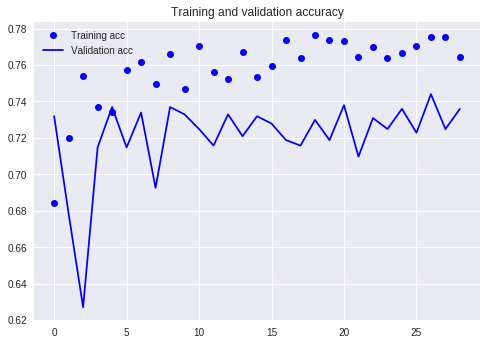

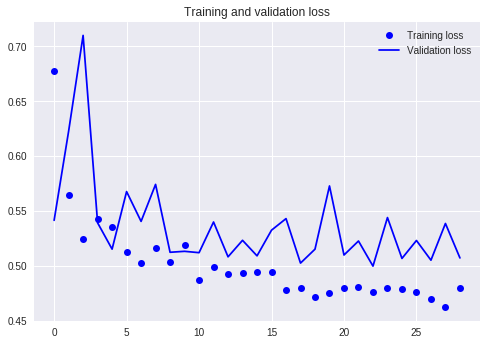

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Fine-tuning

In [15]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [18]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights2.best.hdf5".format('retina')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=3, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=6) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [20]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      callbacks = callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 433s 4s/step - loss: 0.4812 - acc: 0.7688 - val_loss: 0.4966 - val_acc: 0.7520

Epoch 00001: val_loss improved from inf to 0.49660, saving model to retina_weights2.best.hdf5
Epoch 2/100
100/100 [==============================] - 397s 4s/step - loss: 0.4737 - acc: 0.7813 - val_loss: 0.5836 - val_acc: 0.6845

Epoch 00002: val_loss did not improve from 0.49660
Epoch 3/100
100/100 [==============================] - 385s 4s/step - loss: 0.4665 - acc: 0.7793 - val_loss: 0.5088 - val_acc: 0.7379

Epoch 00003: val_loss did not improve from 0.49660
Epoch 4/100
100/100 [==============================] - 381s 4s/step - loss: 0.4635 - acc: 0.7880 - val_loss: 0.4874 - val_acc: 0.7581

Epoch 00004: val_loss improved from 0.49660 to 0.48744, saving model to retina_weights2.best.hdf5
Epoch 5/100
100/100 [==============================] - 376s 4s/step - loss: 0.4663 - acc: 0.7877 - val_loss: 0.5274 - val_acc: 0.7288

Epoch 00005: val_loss did not i

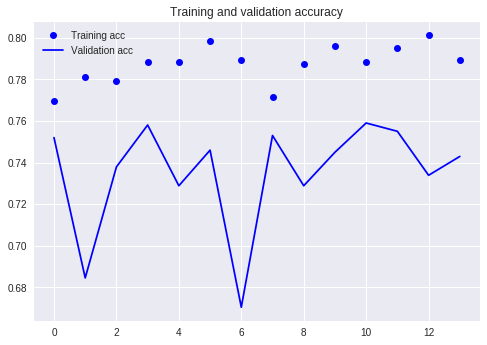

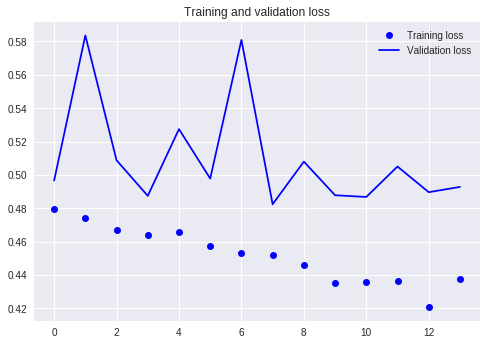

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

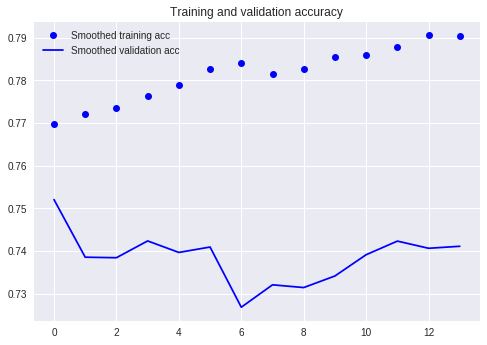

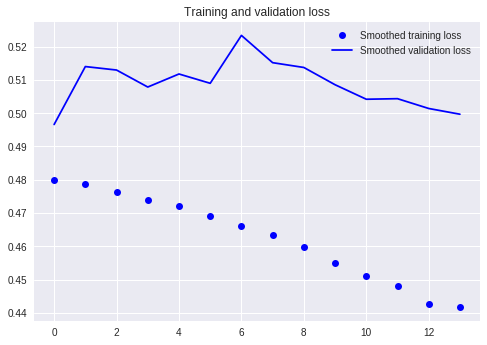

In [22]:

def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 258 images belonging to 2 classes.
test acc: 0.791750502658322
